# Project Notebook

### Imports

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Add, Input
from keras.models import Model
from tensorflow.nn import depth_to_space
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image
import math
from scipy.signal import convolve2d

2022-05-18 12:02:44.676575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-18 12:02:44.676596: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from load_data import loadData
from utils import *
from SRCNN import getModel, compileModel, trainModel
from DIPCI import compile, train

### LOAD DATA

In [3]:
upscale_factor = 4

In [4]:
ssh, sst, ssh_norm, sst_norm, ssh_lr, sst_lr = loadData( upscale_factor )

### SRCNN 

In [5]:
srcnn, callbacks, epochs, checkpoint_filepath = compileModel()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 1)]   0         
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 64)    1664      
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 32)    18464     
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 16)    4624      
                                                                 
 tf.nn.depth_to_space (TFOpL  (None, None, None, 1)    0         
 ambda)                                                          
                                                             

2022-05-18 11:08:16.672451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 11:08:16.672476: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 11:08:16.672494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3800411-Latitude-E7270): /proc/driver/nvidia/version does not exist
2022-05-18 11:08:16.672669: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Might skip training and load checkpoints below

In [ ]:
batch_size = 8
trainModel( srcnn, batch_size, ssh_lr, ssh_norm, callbacks, epochs )

#### Results

In [6]:
srcnn.load_weights(checkpoint_filepath)

Average bicubic PSNR :  31.22162328908182
Average bicubic RMSE :  0.027497676010918647
Average SRCNN PSNR :  34.582380976183245
Average SRCNN RMSE :  0.018628818868241914


<Figure size 432x288 with 0 Axes>

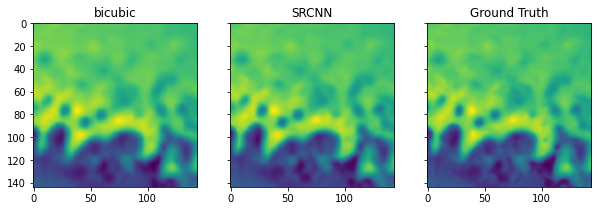

PSNR of Bicubic and Ground Truth image is  29.717047440053015
PSNR of SRCNN and Ground Truth is  33.81439397739133


<Figure size 432x288 with 0 Axes>

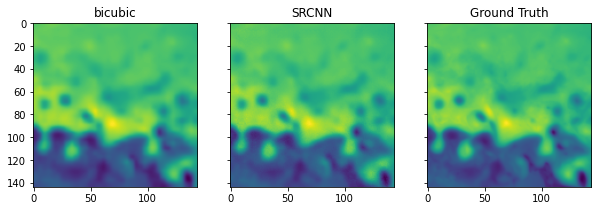

PSNR of Bicubic and Ground Truth image is  30.02485320715275
PSNR of SRCNN and Ground Truth is  33.580846555561216


<Figure size 432x288 with 0 Axes>

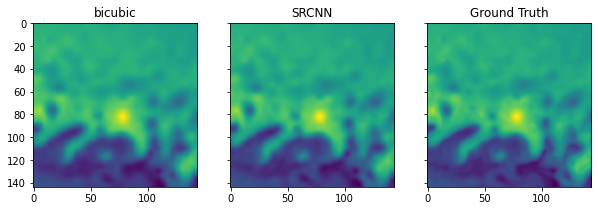

PSNR of Bicubic and Ground Truth image is  34.35547229825576
PSNR of SRCNN and Ground Truth is  37.34692381167845


<Figure size 432x288 with 0 Axes>

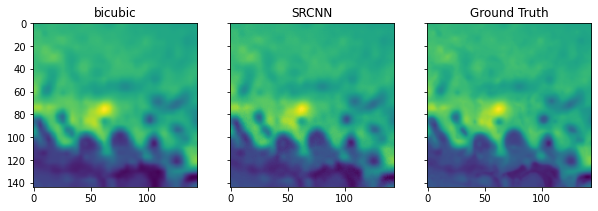

PSNR of Bicubic and Ground Truth image is  27.735050343765373
PSNR of SRCNN and Ground Truth is  31.70467710498835


<Figure size 432x288 with 0 Axes>

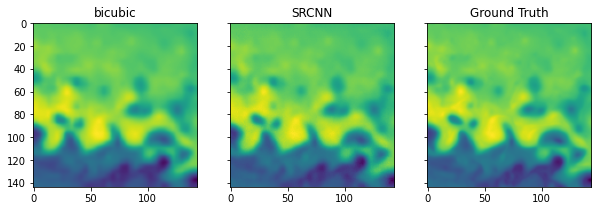

PSNR of Bicubic and Ground Truth image is  30.29110212510758
PSNR of SRCNN and Ground Truth is  34.53594749464639


In [7]:
test_srcnn(srcnn, ssh_lr[366:], ssh[366:])

### DIPCI

In [5]:
dipci, callbacks, epochs, checkpoint_filepath = compile()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lr_input (InputLayer)          [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 hr_input (InputLayer)          [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 model_2 (Functional)           (None, None, None,   833         ['lr_input[0][0]',               
                                1)                                'add[0][0]']              

2022-05-18 12:02:58.769319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 12:02:58.769351: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 12:02:58.769367: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3800411-Latitude-E7270): /proc/driver/nvidia/version does not exist
2022-05-18 12:02:58.769527: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Training (to skip)

In [ ]:
dipci = train(dipci, ssh_lr, sst_lr, ssh_norm, callbacks, epochs)

(72, 72)
Epoch 1/200
12/12 [==============================] - 25s 2s/step - loss: 0.1052 - mse: 0.1052 - PSNR: 11.4620
Epoch 2/200
12/12 [==============================] - 24s 2s/step - loss: 0.0271 - mse: 0.0271 - PSNR: 15.9392
Epoch 3/200
12/12 [==============================] - 24s 2s/step - loss: 0.0152 - mse: 0.0152 - PSNR: 18.2395
Epoch 4/200
12/12 [==============================] - 25s 2s/step - loss: 0.0099 - mse: 0.0099 - PSNR: 20.1169
Epoch 5/200
12/12 [==============================] - 24s 2s/step - loss: 0.0064 - mse: 0.0064 - PSNR: 22.0054
Epoch 6/200
12/12 [==============================] - 25s 2s/step - loss: 0.0046 - mse: 0.0046 - PSNR: 23.4225
Epoch 7/200
12/12 [==============================] - 26s 2s/step - loss: 0.0040 - mse: 0.0040 - PSNR: 24.0340
Epoch 8/200
12/12 [==============================] - 26s 2s/step - loss: 0.0036 - mse: 0.0036 - PSNR: 24.4936
Epoch 9/200
12/12 [==============================] - 27s 2s/step - loss: 0.0032 - mse: 0.0032 - PSNR: 24.9072
E

12/12 [==============================] - 24s 2s/step - loss: 4.0085e-04 - mse: 4.0085e-04 - PSNR: 33.9754
Epoch 73/200
12/12 [==============================] - 24s 2s/step - loss: 3.9852e-04 - mse: 3.9852e-04 - PSNR: 33.9786
Epoch 74/200
12/12 [==============================] - 24s 2s/step - loss: 3.9085e-04 - mse: 3.9085e-04 - PSNR: 34.0887
Epoch 75/200
12/12 [==============================] - 24s 2s/step - loss: 3.7501e-04 - mse: 3.7501e-04 - PSNR: 34.2571
Epoch 76/200
12/12 [==============================] - 24s 2s/step - loss: 3.6585e-04 - mse: 3.6585e-04 - PSNR: 34.3691
Epoch 77/200
12/12 [==============================] - 24s 2s/step - loss: 3.5838e-04 - mse: 3.5838e-04 - PSNR: 34.4615
Epoch 78/200
12/12 [==============================] - 24s 2s/step - loss: 3.5375e-04 - mse: 3.5375e-04 - PSNR: 34.5233
Epoch 79/200
12/12 [==============================] - 24s 2s/step - loss: 3.4412e-04 - mse: 3.4412e-04 - PSNR: 34.6281
Epoch 80/200
12/12 [==============================] - 24s 2s/

12/12 [==============================] - 24s 2s/step - loss: 1.7282e-04 - mse: 1.7282e-04 - PSNR: 37.6312
Epoch 141/200
12/12 [==============================] - 24s 2s/step - loss: 1.7433e-04 - mse: 1.7433e-04 - PSNR: 37.5959
Epoch 142/200
12/12 [==============================] - 24s 2s/step - loss: 1.7022e-04 - mse: 1.7022e-04 - PSNR: 37.6983
Epoch 143/200
12/12 [==============================] - 24s 2s/step - loss: 1.8305e-04 - mse: 1.8305e-04 - PSNR: 37.4187
Epoch 144/200
12/12 [==============================] - 24s 2s/step - loss: 1.6487e-04 - mse: 1.6487e-04 - PSNR: 37.8293
Epoch 145/200
12/12 [==============================] - 24s 2s/step - loss: 1.6372e-04 - mse: 1.6372e-04 - PSNR: 37.8663
Epoch 146/200
12/12 [==============================] - 24s 2s/step - loss: 1.6592e-04 - mse: 1.6592e-04 - PSNR: 37.8072
Epoch 147/200
12/12 [==============================] - 24s 2s/step - loss: 1.7900e-04 - mse: 1.7900e-04 - PSNR: 37.5118
Epoch 148/200
12/12 [==============================] -

### Results

In [8]:
dipci.load_weights(checkpoint_filepath)

Average bicubic PSNR :  31.942320625300418
Average bicubic RMSE :  0.027438150823157176
Average DIPCI PSNR :  30.730498206145278
Average DIPCI RMSE :  0.03206507030454405


<Figure size 432x288 with 0 Axes>

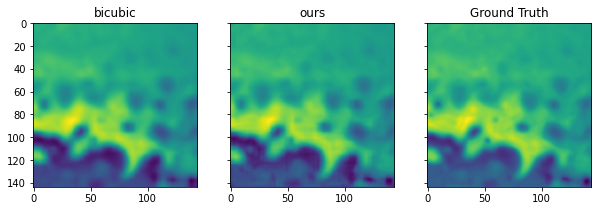

PSNR of Bicubic and Ground Truth image is  24.0005222861492
PSNR of DIPCI and Ground Truth is  25.094197016892124


<Figure size 432x288 with 0 Axes>

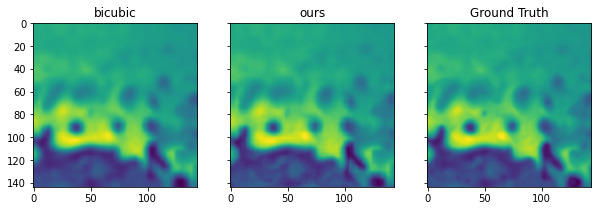

PSNR of Bicubic and Ground Truth image is  35.40626692392877
PSNR of DIPCI and Ground Truth is  34.20152973359589


<Figure size 432x288 with 0 Axes>

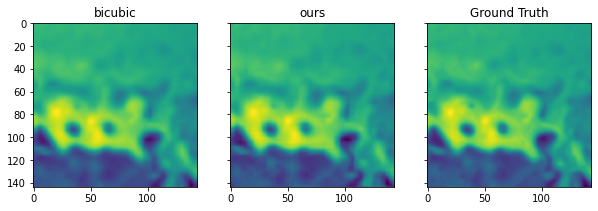

PSNR of Bicubic and Ground Truth image is  34.16422086424605
PSNR of DIPCI and Ground Truth is  33.498010367535436


<Figure size 432x288 with 0 Axes>

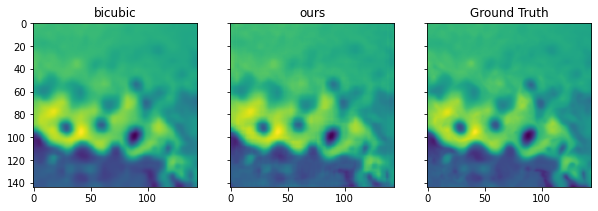

PSNR of Bicubic and Ground Truth image is  33.50176760356882
PSNR of DIPCI and Ground Truth is  29.138851938548733


<Figure size 432x288 with 0 Axes>

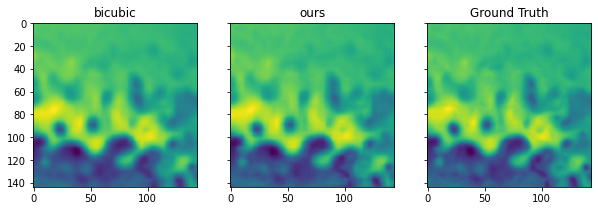

PSNR of Bicubic and Ground Truth image is  32.04913477720635
PSNR of DIPCI and Ground Truth is  31.429513494168635


In [10]:
test_dipci(dipci, ssh_lr[:366], sst_lr[:366], ssh[:366])